# Predicting McDonald's market capitalization

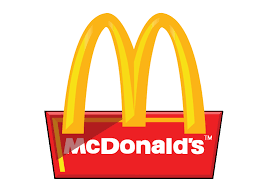

https://www.kaggle.com/datasets/mikhail1681/mcdonalds-financial-statements-2002-2022

The project's objective is to analyze data on companies' market capitalization and financial performance using a linear regression model to:

- Understand the relationship between financial performance and market capitalization.
- Develop a model to predict a company's market capitalization based on financial indicators.
- Offer a tool for investors, analysts, and business executives to assist in making informed investment decisions, evaluating companies' financial health, and formulating business strategies.

Data Description

Year: Year of report

Market cap ($B): Market capitalization in billions of dollars

Revenue ($B): Revenue in billions of dollars

Earnings ($B): Earnings in billions of dollars

P/E ratio: Price-earnings ratio

P/S ratio: Price-to-Sales

P/B ratio: Price-to-Book (price to book value)

Operating Margin (\%): Operating Margin in percentages

EPS ($): Earnings Per Share in dollars

Shares Outstanding (B): Number of shares outstanding in billions

Cash on Hand ($B): Cash on Hand in billions

Dividend Yield (\%): Dividend yield history in percentages

Dividend (stock split adjusted) ($): Dividend history in dollars

Net assets ($B): Net assets in billions of dollars

Total assets ($B): Total assets in billions of dollars

Total debt ($B): Total debt in billions of dollars

Total liabilities ($B): Total liabilities in billions of dollars


In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data preparation

In [4]:
df = pd.read_csv('McDonalds_financial_statements.csv')

In [5]:
df.head()

,Year,Market cap ($B),Revenue ($B),Earnings ($B),P/E ratio,P/S ratio,P/B ratio,Operating Margin (%),EPS ($),Shares Outstanding ($B),Cash on Hand ($B),Dividend Yield (%),Dividend (stock split adjusted) ($),Net assets ($B),Total assets ($B),Total debt ($B),Total liabilities ($B)
0,2022,193.01,23.18,7.82,31.3,8.33,-32.2,33.76,8.42,0.73,2.58,2.15,5.66,-6.01,50.43,48.03,56.43
1,2021,200.31,23.22,9.12,26.5,8.63,-43.5,39.31,10.11,0.74,4.70,1.96,5.25,-4.61,53.60,48.64,58.20
2,2020,159.88,19.20,6.14,33.8,8.32,-20.4,31.97,6.35,0.74,3.44,2.35,5.04,-7.83,52.62,48.51,60.45
3,2019,147.47,21.28,8.01,24.8,6.93,-18.0,38.04,7.98,0.74,0.89,2.39,4.73,-8.22,47.51,46.87,55.72
4,2018,136.21,21.02,7.81,23.2,6.48,-21.8,37.17,7.65,0.76,0.86,2.36,4.19,-6.26,32.81,31.07,39.06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 21 non-null     int64  
 1   Market cap ($B)                      21 non-null     float64
 2   Revenue ($B)                         21 non-null     float64
 3   Earnings ($B)                        21 non-null     float64
 4   P/E ratio                            21 non-null     float64
 5   P/S ratio                            21 non-null     float64
 6   P/B ratio                            21 non-null     float64
 7   Operating Margin (%)                 21 non-null     float64
 8   EPS ($)                              21 non-null     float64
 9   Shares Outstanding ($B)              21 non-null     float64
 10  Cash on Hand ($B)                    21 non-null     float64
 11  Dividend Yield (%)                

In [7]:
df.describe()

,Year,Market cap ($B),Revenue ($B),Earnings ($B),P/E ratio,P/S ratio,P/B ratio,Operating Margin (%),EPS ($),Shares Outstanding ($B),Cash on Hand ($B),Dividend Yield (%),Dividend (stock split adjusted) ($),Net assets ($B),Total assets ($B),Total debt ($B),Total liabilities ($B)
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2012.000000,96.824286,22.706190,6.214762,21.661905,4.234762,-7.100000,26.889048,4.852857,0.994762,2.387619,2.487143,2.754286,7.217143,35.016190,21.286190,27.793810
std,6.204837,50.396346,3.398316,2.226166,5.541974,2.266896,19.356029,8.355580,2.507501,0.200714,1.639948,0.575518,1.679874,9.489797,8.715523,14.922204,16.800857
min,2002.000000,20.390000,15.400000,1.660000,15.000000,1.320000,-45.900000,10.790000,0.700000,0.730000,0.330000,1.460000,0.240000,-8.220000,23.970000,8.430000,13.540000
25%,2007.000000,67.220000,20.810000,3.880000,16.500000,2.950000,-20.400000,19.300000,2.880000,0.790000,1.370000,2.150000,1.500000,-3.270000,29.390000,10.140000,14.840000
50%,2012.000000,90.220000,22.820000,6.860000,21.400000,3.360000,2.870000,28.520000,4.880000,1.000000,2.130000,2.390000,2.870000,12.850000,32.810000,13.630000,20.090000
75%,2017.000000,136.210000,24.620000,8.010000,24.800000,6.010000,5.530000,31.970000,6.350000,1.180000,2.580000,2.940000,3.830000,14.630000,36.620000,29.530000,37.070000
max,2022.000000,200.310000,28.100000,9.120000,33.800000,8.630000,15.100000,39.310000,10.110000,1.270000,7.680000,3.500000,5.660000,16.000000,53.600000,48.640000,60.450000


In [8]:
df.isnull().sum()

Year                                   0
Market cap ($B)                        0
Revenue ($B)                           0
Earnings ($B)                          0
P/E ratio                              0
P/S ratio                              0
P/B ratio                              0
Operating Margin (%)                   0
EPS ($)                                0
Shares Outstanding ($B)                0
Cash on Hand ($B)                      0
Dividend Yield (%)                     0
Dividend (stock split adjusted) ($)    0
Net assets ($B)                        0
Total assets ($B)                      0
Total debt ($B)                        0
Total liabilities ($B)                 0
dtype: int64

In [9]:
indicators = ['Revenue ($B)', 'Earnings ($B)', 'P/E ratio',
       'P/S ratio', 'P/B ratio', 'Operating Margin (%)', 'EPS ($)',  
              'Total debt ($B)', 'Total liabilities ($B)']

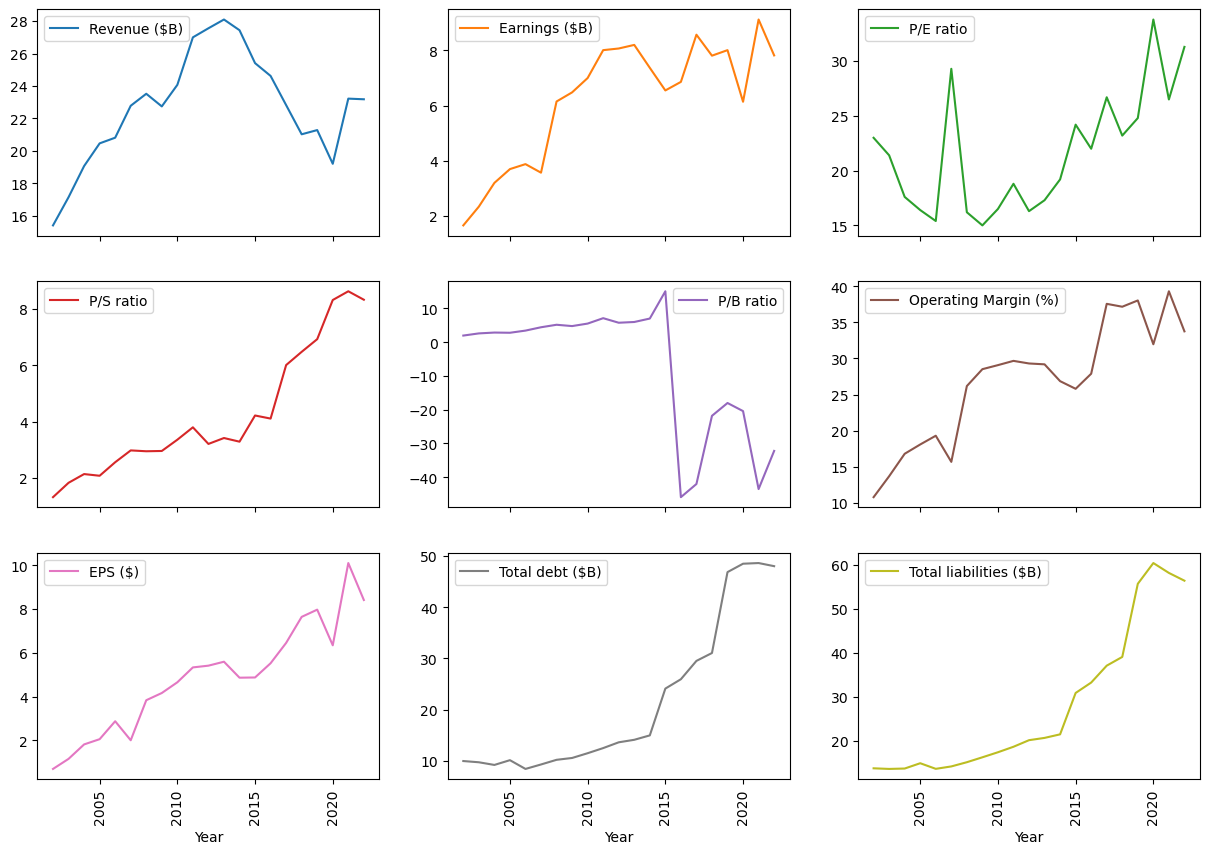

In [10]:
df.plot(x='Year', y=indicators, subplots=True, layout=(3, 3), figsize=(15, 10), sharex=True, rot=90);

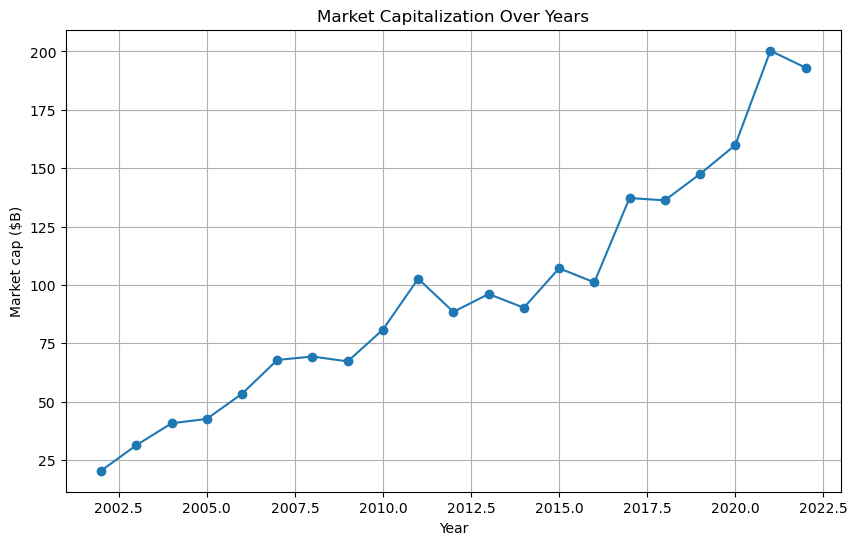

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Market cap ($B)'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Market cap ($B)')
plt.title('Market Capitalization Over Years')
plt.grid(True)

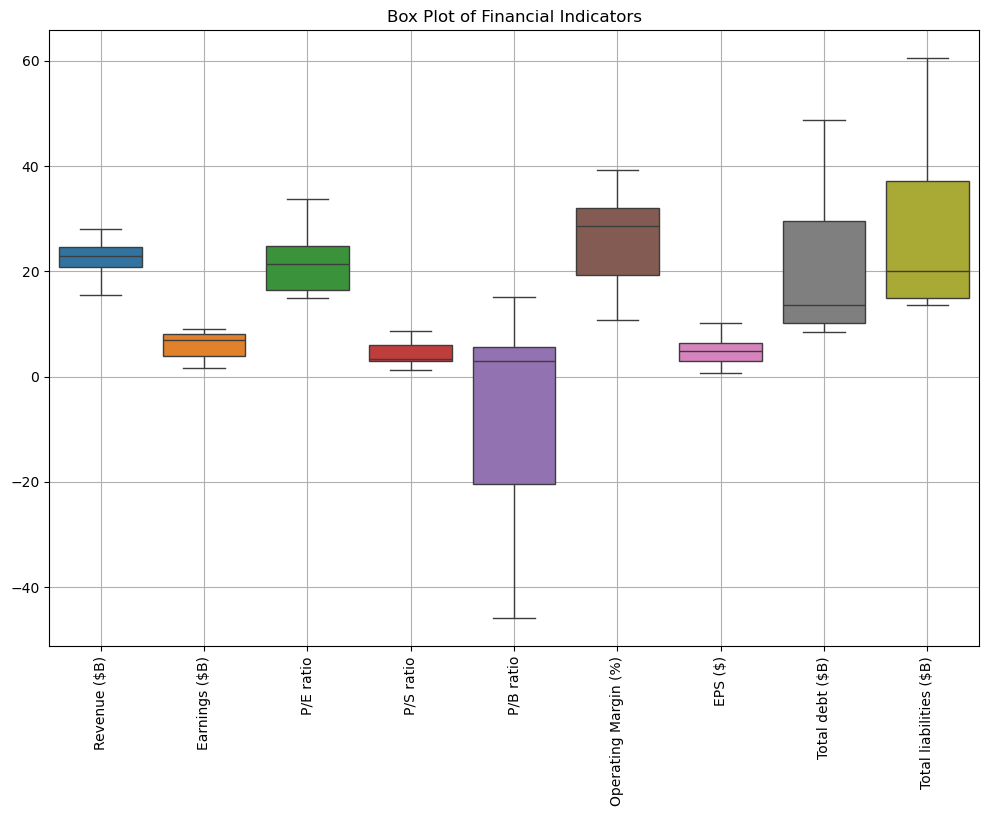

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[indicators])
plt.title('Box Plot of Financial Indicators')
plt.xticks(rotation=90)
plt.grid(True);

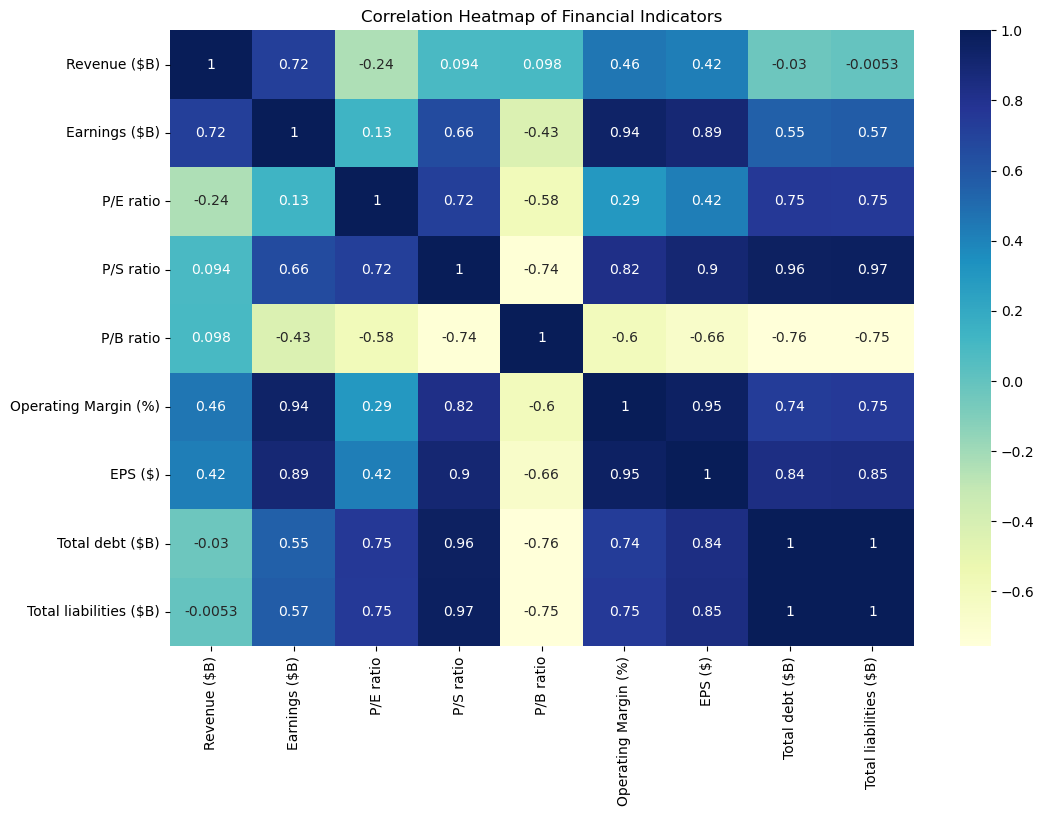

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[indicators].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap of Financial Indicators');

'Total debt' and 'Total liabilities' are financial metrics that can be interconnected as they both represent a company's financial obligations. If the correlation between them is 1, it suggests that the values for Total Debt and Total Liabilities are identical or nearly so. To prevent multicollinearity, we will exclude one of these features.

In [14]:
new_indicators = ['Revenue ($B)', 'Earnings ($B)', 'P/E ratio',
       'P/S ratio', 'P/B ratio', 'Operating Margin (%)', 'EPS ($)', 'Total liabilities ($B)']

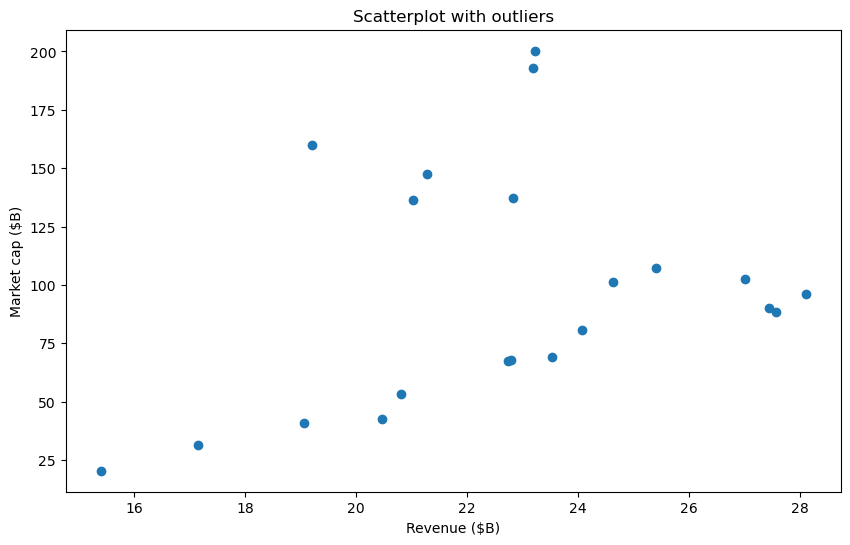

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Revenue ($B)'], df['Market cap ($B)'])
plt.xlabel('Revenue ($B)')
plt.ylabel('Market cap ($B)')
plt.title('Scatterplot with outliers');

# Dividing data into training and test sets to train the model and evaluate its quality

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df[['Revenue ($B)', 'Earnings ($B)', 'P/E ratio',
       'P/S ratio', 'P/B ratio', 'Operating Margin (%)', 
        'EPS ($)', 'Total liabilities ($B)']]

In [19]:
y = df['Market cap ($B)']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Feature scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train)

In [24]:
X_test_scaled = scaler.transform(X_test)

# Training a linear regression model on a training data set

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)

LinearRegression()

# Model evaluation

In [33]:
model.score(X_test, y_test)

0.9797233195873958

In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
y_pred = model.predict(X_test)

In [36]:
mean_absolute_error(y_test, y_pred)

5.274624088039831

# Additional analysis

In [37]:
model.coef_

array([-0.20867481, 15.77236841, -0.50337572, 27.10342896, -0.08704249,
       -3.79400818, -2.54259995, -0.10538923])

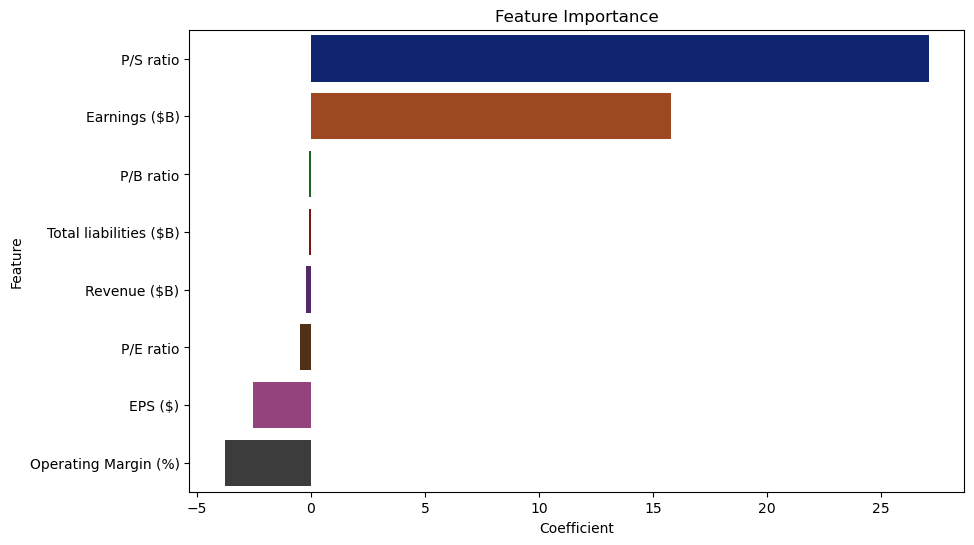

In [43]:
feature_importance = pd.Series(model.coef_, index=new_indicators).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette = 'dark')
plt.title('Feature Importance')
plt.xlabel('Coefficient')
plt.ylabel('Feature');

# Conclusion.

The model evaluation is highly promising:

The model's coefficient of determination is about 0.980, indicating that around 98% of the variation in market capitalization is accounted for by the financial indicators. The mean absolute error (MAE) is roughly $5.27 billion, meaning that the model's predictions of market capitalization are, on average, off by this amount.